In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import statsmodels.api as sm

In [2]:
df = pd.read_csv('copacabana.csv', delimiter=';')

In [3]:
df.head()

,Posicao,Quartos,Vagas,DistIpanema,DistPraia,DistFavela,RendaMedia,RendaMovel,RendaMovelRua,Vu2009,Mes,Idade,Tipologia,AreaConstruida,VAL_UNIT,X,Y
0,1,3.0,0.01,1144,311,146,969501,1028834,999168,1750,509,37.0,1,95,4379,685365.0700,7457802.680
1,0,2.0,0.01,2456,502,254,1472861,1137759,1305310,2300,484,30.0,1,71,6479,685941.5500,7459001.320
2,0,2.0,0.01,2448,772,229,1803724,1512475,1658100,2350,920,44.0,1,58,12414,685627.3900,7459080.520
3,0,2.0,0.01,1615,428,310,1124331,1370600,1247466,2200,930,43.0,1,88,11250,685438.2001,7458268.280
4,0,2.0,1.00,2358,586,287,1165764,1177933,1171849,2150,918,42.0,1,68,13382,685764.3840,7458954.513


In [4]:
del df['RendaMedia']
del df['RendaMovel']

In [5]:
df.tail()

,Posicao,Quartos,Vagas,DistIpanema,DistPraia,DistFavela,RendaMovelRua,Vu2009,Mes,Idade,Tipologia,AreaConstruida,VAL_UNIT,X,Y
1670,1,2.0,2.0,2866,562,416,2008680,2450,360,2.00,1,114,4210,686269.46,7459312.08
1671,1,2.0,2.0,2488,1030,106,1396072,1550,509,0.01,1,95,4232,685346.97,7459162.11
1672,1,2.0,2.0,2488,1030,106,1396072,1550,509,0.01,1,95,6316,685346.97,7459162.11
1673,1,2.0,2.0,2488,1030,106,1396072,1550,445,0.01,1,113,6785,685346.97,7459162.11
1674,1,2.0,2.0,2488,1030,106,1396072,1550,445,0.01,1,101,6771,685346.97,7459162.11


In [6]:
def ajustar_zero(v):
    if v == 0.01:
        return 0
    return v
df['Vagas'] = df['Vagas'].apply(ajustar_zero)
df['Idade'] = df['Idade'].apply(ajustar_zero)

In [7]:
df['Vagas'].value_counts()

0.0    1216
1.0     390
2.0      57
3.0      10
4.0       2
Name: Vagas, dtype: int64

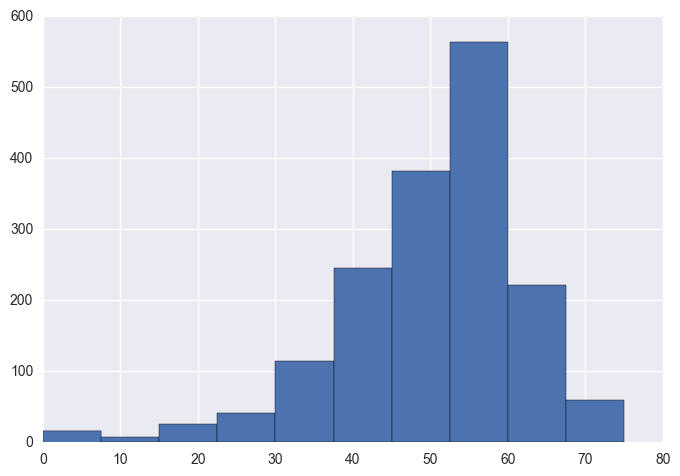

In [8]:
df['Idade'].hist()

In [9]:
df[df['Idade'] < 20]

,Posicao,Quartos,Vagas,DistIpanema,DistPraia,DistFavela,RendaMovelRua,Vu2009,Mes,Idade,Tipologia,AreaConstruida,VAL_UNIT,X,Y
1650,0,2.0,2.0,2650,419,381,1503694,2500,842,17.0,1,74,13108,686211.6000,7459102.200
1651,0,2.0,2.0,2650,419,381,1503694,2500,554,14.0,1,72,6944,686211.6000,7459102.200
1652,0,2.0,2.0,2650,419,381,1503694,2500,484,14.0,1,74,7568,686211.6000,7459102.200
1653,0,1.0,0.0,791,445,47,1128166,800,825,17.0,1,49,5816,685153.1000,7457474.120
1654,0,4.0,3.0,2442,894,189,1739869,2300,920,12.0,1,166,13253,685475.4576,7459100.927
1655,1,2.0,2.0,2853,530,436,2080971,2450,930,12.0,1,156,13974,686292.3707,7459288.323
1656,1,1.0,0.0,1669,69,693,1359616,2700,385,7.0,1,43,6977,685816.0100,7458204.550
1657,1,1.0,0.0,1669,69,693,1359616,2700,405,7.0,1,48,3750,685816.0100,7458204.550
1658,0,1.0,0.0,1669,69,693,1359616,2700,573,7.0,1,37,7568,685816.0100,7458204.550
1659,0,1.0,0.0,1669,69,693,1359616,2700,573,7.0,1,37,6216,685816.0100,7458204.550


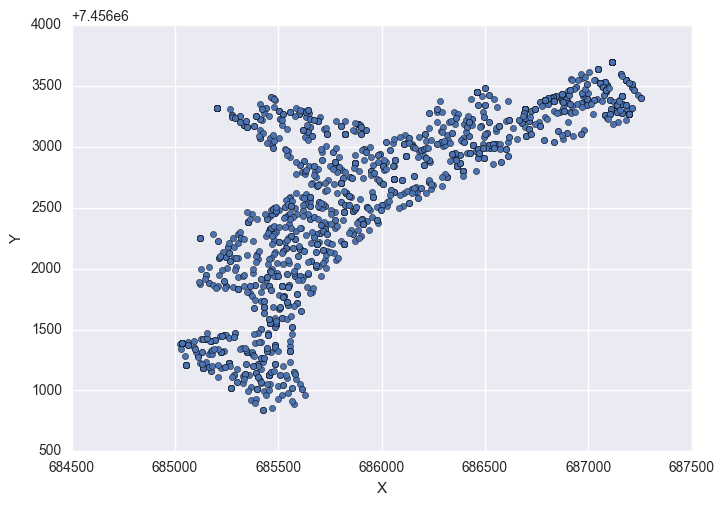

In [10]:
df.plot.scatter('X', 'Y')

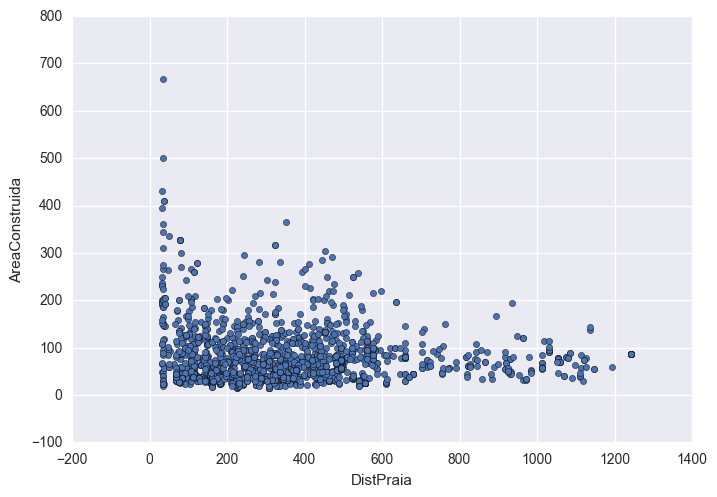

In [11]:
df.plot.scatter('DistPraia', 'AreaConstruida')

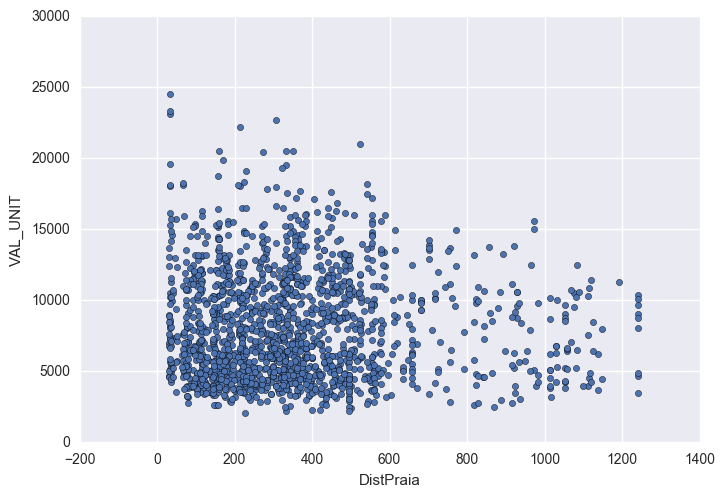

In [12]:
df.plot.scatter('DistPraia', 'VAL_UNIT')

In [13]:
del df['X']
del df['Y']

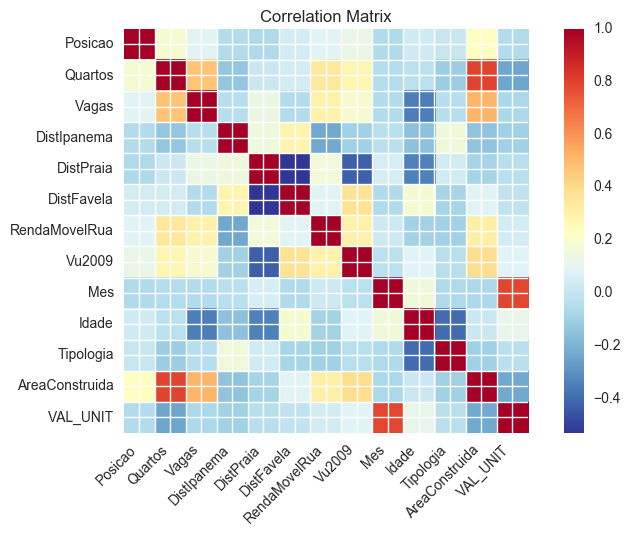

In [14]:
corr_matrix = np.corrcoef(df.T)
sm.graphics.plot_corr(corr_matrix, xnames=list(df.columns.values))
plt.show()

In [15]:
X = df[
    ['Posicao', 'Quartos', 'Vagas', 'DistPraia', 'Mes', 'Idade', 'Tipologia', 'AreaConstruida']
]
Y = df['VAL_UNIT']
X = sm.add_constant(X)

In [16]:
model = sm.OLS(Y, X)
results = model.fit()

In [17]:
results.params

const             477.005356
Posicao           267.953788
Quartos          -557.701617
Vagas             831.462395
DistPraia          -1.437578
Mes                14.371171
Idade               0.249605
Tipologia         -17.233494
AreaConstruida     -7.850720
dtype: float64

In [18]:
predict = model.predict(results.params, X)
predict = pd.DataFrame(predict, columns=['Y_HAT'])

In [19]:
predict['Y'] = Y

In [20]:
predict

,Y_HAT,Y
0,5185.877150,4379
1,5028.438351,6479
2,11011.676798,12414
3,11414.144134,11250
4,12002.779949,13382
5,10666.261019,11618
6,9315.783656,6505
7,7625.120431,6410
8,11190.883663,14545
9,12732.458902,11111
